## Gaussian Mixture Model for Clustering
    (Expectation Maximization(EM) Algorithm)

### Mathematical formulation of the problem
Given $N$ data points ${\bf X} = {\bf {x_1, x_2, ..., x_N}}$ in M-dimensional space, find $K$ multivariate Gaussian distributions 
that best represent the observed distributionof the data points.

\begin{pmatrix}
    x_{11} & x_{12} & x_{13} & ... & x_{1M} \\
    x_{21} & x_{22} & x_{23} & ... & x_{2M} \\
    ...\\
    ...\\
    x_{N1} & x_{N2} & x_{N3} & ... & x_{NM} \\
\end{pmatrix}

### Desired output:
Estimate the probability that a given data ${\bf n \equiv \bf x_n} = {\bf [x_{n1}, x_{n2}, ..., x_{nN}]}$ comes from a distribution ${\bf k } \equiv {\bf [\mu_k, \Sigma_k]}$ of the $K$ Gaussian distribution.
- Conditional probability: $\bf p(k | n)$ 
- Given ${\bf n} = {\bf [x_{n1}, x_{n2}, ..., x_{nN}]}$, find the probability that 
the data belongs to class $k = \bf [\mu_k, \Sigma_k]$ of the Gaussian distribution

### Known
- $K$ is fixed in advance

### Want to predict - means and covariances for $0 \le k \le K$
- \begin{bmatrix} \mu_1 & \mu_2 & ... & \mu_K \end{bmatrix} 
- \begin{bmatrix} 
\Sigma_1 & \Sigma_2  & ... & \Sigma_K 
\end{bmatrix}
- each $\Sigma$ is $M x M$ matrix


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Motivation: 
#### Eruptions duration and wating times of Old Faithful geyser at Yellowstone National park
"A geyser is a vent in Earth's surface that periodically ejects a column of hot water and steam. Even a small geyser is an amazing phenomenon; however some geysers have eruptions that blast thousands of gallons of boiling hot water up to a few hundred feet in the air.

Old Faithful is the world's best known geyser. It is located in Yellowstone National Park (USA). Old Faithful erupts every 60 to 90 minutes and blasts a few thousand gallons of boiling hot water between 100 and 200 feet into the air." [See Reference](http://geology.com/articles/geyser.shtml)

Here is a video of gyser on wikipedia that is a good example for the duration of the eruption
[Geyser in Iceland Video Link](https://en.wikipedia.org/wiki/File:Strokkur,_Iceland_-_20100703.ogv)


#### Old Faithful observation data saved in text file old_faithful_data.txt
[Link for the source of data used here](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat)

In [4]:
old_faithful = pd.read_fwf('old_faithful_data.txt', usecols=["eruptions", "waiting"])
old_faithful.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [5]:
old_faithful.head(3)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74


Populating the interactive namespace from numpy and matplotlib


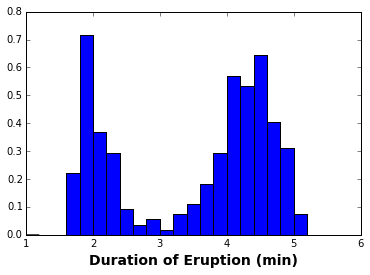

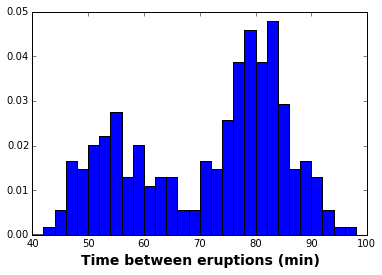

In [6]:
%pylab inline
plt.hist(old_faithful.eruptions, bins = np.arange(1,6,.2), normed=True)
plt.xlabel('Duration of Eruption (min)', fontsize=14, fontweight='bold')
plt.show()
plt.hist(old_faithful.waiting, bins = np.arange(40,100,2), normed=True)
plt.xlabel('Time between eruptions (min)', fontsize=14, fontweight='bold')
plt.show()

### Use a mixture of Gaussians
$p(x) = \sum \pi_k \mathcal{N}(x|\mu_k,\Sigma_k)$ 

### Goal: predict best values of ${\bf \mu_k}$ and ${\bf \Sigma_k}$ for each $k$ ($0 \le k \le K$) 
The best value of ${\mu_k}$ and ${\Sigma_k}$ can be determined by maximizing the likelihood, $p(x|k)$

### Recall 
- Sum rule:    &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp;   $P(X) = {\sum_Y P(X, Y)}$ 
- Joint probability: &nbsp; &nbsp; &nbsp; $P(X,Y) = P(Y |X) P(X)$
- Symmetry:     &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  $P(X,Y) = P(Y,X)$

### $P(Y|X) = {\frac{P(X|Y)P(Y)}{P(X)}} = {\frac{P(X|Y)P(Y)}{\sum_Y P(X|Y)P(Y)}}$
- $P(Y)$ &nbsp; &nbsp;: prior probability
- $P(Y|X)$ : posterior
- $P(X|Y)$ : Likelihood



### Optimization:
Maximization of the likelihood $P(X|Y)$
- #### $p({\bf x|\mu_k, \Sigma_k})$

### Single gaussian distribution
- #### $p({\bf x|\mu_k, \Sigma_k}) = \prod_{n=1}^{N}p(x_n|\mu,\Sigma) = \prod_{n=1}^{N}\mathcal{N}(x_n|\mu,\Sigma)$
- $\mathcal{N}(x_n|\mu,\Sigma^2)$ : Normal distribution
- Maximization can be done easily by taking the derivatives of the logarithmic function
- Closed anlytical solution can be determined. 

### Mixture of $K$ Gaussian Distributions and Likelihood function
- Linear superposition of Gaussians
    - #### $p({\bf x) = \sum_k \pi_k \mathcal{N}(x|\mu_k,\Sigma_k)}$
- ### $\pi_k$ : 

    -fraction of data points in component $k$ (probability of a randomly chosen data point belongs to $k$)
    - #### $\sum_{k=1}^K \pi_k = 1$  &nbsp; for $0 \le \pi_k \le 1$
    
- #### $p({\bf x|\mu_k, \Sigma_k}) = \prod_{n=1}^{N}\sum_k \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)$
 
-Taking the logarithm of the likelihood function
- ### $\ln p({\bf x|\mu_k, \Sigma_k}) = \sum_{n=1}^{N} \ln \{ \sum_k \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k^2) \}$
- Derivation w.r.t.$\mu$ and setting equal to zero
- ### $0 = -\sum_{n=1}^{N} \frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{ \sum_k \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}\Sigma_k(x_n - \mu_k)$

    - No closed-form solution for gaussian mixture because of sum of exponential function (i.e., Gaussian)
    - Other approaches:
        - Gradient Method
        - Expectation Maximization (EM) method
 See Bishop for more detail.

### Expectation Maximization

-Rearranging terms from
- ### $0 = -\sum_{n=1}^{N} \frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{ \sum_j \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j)}\Sigma_k(x_n - \mu_k)$

iterative relations can be derived that allows numerical determination of $\mu_k$,
$N_k$ (hence $\pi_k$ using $\pi_k = N_k/N$ and $\Sigma_k$.

Let $\gamma_k$ be expressed as 
- ### $\gamma_{nk} =  \frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{ \sum_j \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j)}$

Then
- ### $\mu_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma_{nk} x_n$
- ### $N_k = \sum_{n=1}^{N} \gamma_{nk}$
- ### $\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^T$
- ### $\pi_k = \frac{N_k}{N}$


### Expectation Maximization Algorithm for Gaussian Mixture
Maximizes the likelihood function to predict parameters (means, covariances) that best 
describes the mixture Gaussian distributions
- initialize $\mu_k$, $\Sigma_k$, $\pi_k$
- ${\bf E step}$: evaluate $\gamma_{nk}$
- ${\bf M step}$: Re-estimate $\mu_k^{new}$, $\Sigma_k^{new}$, $\pi_k^{new}$ as described above
- Evaluate the log likelihood $\ln p(X|\mu, \Sigma, \pi)$ and check for convergence.

### PyMix library as a tool for mixture model
- PyMix is a python mixure model and is freely available for download 
from the following [link](http://www.pymix.org/pymix/index.php?n=PyMix.Download)
- unfortunately not supported by anaconda and cannot use 'conda install <package>'
- Some issues may arise upon installing
- requires GNU Scientific Library (GSL) be installed.
    - GSL can be downloaded at the following [link](http://www.gnu.org/software/gsl/)
- Pymix uses older python versions  Use 
- Some work arounds
    - Use (switch) to Python 2.7 instead of Python 3.4 when running Pymix or make changes to the codes like mixture.py of the Pymix (e.g., print statements, etc.)
    -If the path to Pymix binary fails during installation, run the program within PyMix directory

### EM calculation example -1
#### Synthetic multivariate data 
- Consider two dimensional data of points that would require two Gaussians for clustering.
- Let us generate random bivariate data using multivariate_normal()

Populating the interactive namespace from numpy and matplotlib


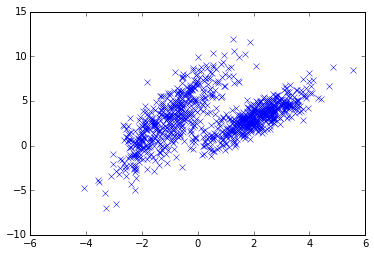

In [7]:
mu1 = [2,3]
cov1 = np.array([[1,1.5], [1.5, 3]])
x1,y1 = np.random.multivariate_normal(mu1,cov1,500).T

mu2 = [-1, 3]
cov2 = np.array([[1,2.5], [2.5, 10]])
x2,y2 = np.random.multivariate_normal(mu2,cov2,500).T

a = np.array(zip(x1,y1))
b = np.array(zip(x2,y2))
c = np.concatenate((a,b), axis=0)

%pylab inline
x, y = zip(*c)
plt.plot(x,y, 'x')
plt.show()

### PyMix Implementation
Let us use PyMix to predict parameters

In [8]:
# import the mixture module
import mixture

#### Prepare pymix data set
- convert the data we want to cluster into pymix data set
- pymix Data Set - an object with many utility functions

In [9]:
# Create a new pymix data set
data = mixture.DataSet()

# Use fromArry() method to convert numpy array to pymix data set
data.fromArray(c)   # c is our 2D synthetic numpy array

#### Perform Clustering using a mixture of Gaussians
- We select $K = 2$
- initialize ${\bf \mu}$, $\Sigma$, $\pi$
    - Note that the dimension $M = 2$. Therefore for ${\bf \mu_k}$ is a vector of 2 elements
    and ${\bf \Sigma_k}$ is a matrix of 2 x 2 elements.
    - Assume equal probability $\pi_k$ for each Gaussian, i.e., use $\pi = [0.5, 0.5]^T$
- Using initial values for the parameters ${\bf \mu}$ and $\Sigma$, define bivariate Gaussian objects with the corresponding mean and covariances.

In [10]:
mu1 = [0.5,2]
cov1 = [[1.0,0.0],[0.0,2.0]]
n1 = mixture.MultiNormalDistribution(2,mu1,  cov1)

mu2 = [-0.5,2]
cov2 = [[1.0,0.0],[0.0,2.0]]
n2 = mixture.MultiNormalDistribution(2,mu2,  cov2)

Combine the two bivariate Gaussians using initial probabilities $\pi_k$ of each Gaussian.

In [11]:
pi_k = [0.5, 0.5]
mix = mixture.MixtureModel(2,pi_k, [n1,n2])
print mix

G = 2
p = 2
pi =[ 0.5  0.5]
compFix = [0, 0]
Component 0:
  ProductDist: 
  Normal:  [[ 0.5  2. ], [[1.0, 0.0], [0.0, 2.0]]]

Component 1:
  ProductDist: 
  Normal:  [[-0.5  2. ], [[1.0, 0.0], [0.0, 2.0]]]




### Apply EM
Perform parameter estimation by applying expectation Maximization (EM) algorithm
E and M steps are carried out.

In [12]:
mix.EM(data,50,0.1)  #50 - max number of iterations;  
                     # 0.1 - convergence criteria based on difference in subsequent 
                     # log likelihood 
print mix

Parsing data set...done
Step 1: log likelihood: -5622.27894462   (diff=-5621.27894462)
Step 2: log likelihood: -4171.87963124   (diff=1450.39931338)
Step 3: log likelihood: -4087.98072743   (diff=83.898903816)
Step 4: log likelihood: -3966.89182372   (diff=121.088903702)
Step 5: log likelihood: -3848.33494947   (diff=118.556874258)
Step 6: log likelihood: -3779.92528896   (diff=68.4096605027)
Step 7: log likelihood: -3761.87076903   (diff=18.0545199385)
Step 8: log likelihood: -3759.04480646   (diff=2.82596256141)
Step 9: log likelihood: -3758.64069834   (diff=0.404108127328)
Step 9: log likelihood: -3758.57842013   (diff=0.0622782043097)
Convergence reached with log_p -3758.57842013 after 9 steps.
G = 2
p = 2
pi =[ 0.49946279  0.50053721]
compFix = [0, 0]
Component 0:
  ProductDist: 
  Normal:  [[ 2.0938068   3.13329072], [[0.9041802686024257, 1.3010856568444966], [1.3010856568444966, 2.7273440424502406]]]

Component 1:
  ProductDist: 
  Normal:  [[-1.01013482  2.96365713], [[1.017903

### Classify the data to form cluster
Assign each data to one of the components

In [13]:
clust = mix.classify(data)

classify loglikelihood: -3758.57842013.


** Clustering **
Cluster  0 , size 500
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 

### Visualize the outputs

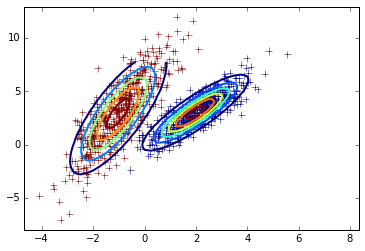

In [14]:
from scipy.stats import multivariate_normal

plt.scatter(x, y, marker='+', c=clust, s=50, linewidths=0.5)

X,Y = np.mgrid[-4:8:.25, -4:8:.25]
pos = np.dstack((X, Y))
rv = multivariate_normal([ 1.9774238,   2.98713578], 
                         [[1.1396755302109534, 1.7102907806376415], 
                          [1.7102907806376415, 3.407704515889587]])
plt.contour(X, Y, rv.pdf(pos), linewidths=2)


pos = np.dstack((X, Y))
rv = multivariate_normal([-1.02942767,  2.89693294], 
                         [[1.0120839933668186, 2.438264746877533], 
                          [2.438264746877533, 9.403664656871133]])
plt.contour(X, Y, rv.pdf(pos), linewidths=2)
plt.show()

### Old Faithful Data

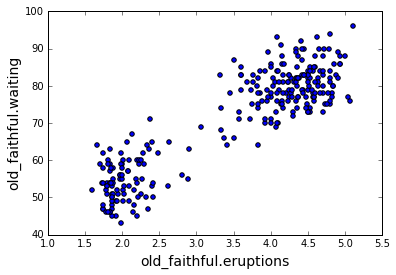

In [15]:
x, y = np.array(old_faithful.eruptions), np.array(old_faithful.waiting)
plt.scatter(x,y)
plt.xlabel('old_faithful.eruptions', fontsize=14)
plt.ylabel('old_faithful.waiting', fontsize=14)

In [16]:
c = np.array(zip(x,y))
data = mixture.DataSet()
data.fromArray(c)

In [17]:
mu1 = [5,80]
cov1 = np.array([[1.0,0.0],[0.0,2.0]])
n1 = mixture.MultiNormalDistribution(2,mu1,  cov1 )


mu2 = [2, 50]
cov2 = np.array([[1.0,0.0],[0.0,2.0]])
n2 = mixture.MultiNormalDistribution(2,mu2,  cov2 )

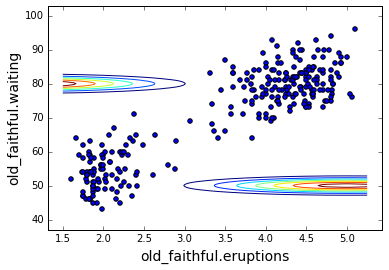

In [18]:
from scipy.stats import multivariate_normal

plt.scatter(x, y)
plt.xlabel('old_faithful.eruptions', fontsize=14)
plt.ylabel('old_faithful.waiting', fontsize=14)

X,Y = np.mgrid[1.5:5.5:.25, 40:100:.25]
pos = np.dstack((X, Y))
rv = multivariate_normal([5,50],  [[1.0,0.0],[0.0,2.0]])
plt.contour(X, Y, rv.pdf(pos))

pos = np.dstack((X, Y))
rv = multivariate_normal([1,80],  [[1.0,0.0],[0.0,2.0]])
plt.contour(X, Y, rv.pdf(pos))
plt.show()

In [19]:
pi_k = [0.5,0.5]
m = mixture.MixtureModel(2,pi_k, [n1,n2])
m.EM(data,40,0.1)
print m

Parsing data set...done
Step 1: log likelihood: -3574.40881182   (diff=-3573.40881182)
Step 2: log likelihood: -1139.67882002   (diff=2434.7299918)
Step 3: log likelihood: -1130.31612864   (diff=9.36269138646)
Step 3: log likelihood: -1130.26619146   (diff=0.0499371815374)
Convergence reached with log_p -1130.26619146 after 3 steps.
G = 2
p = 2
pi =[ 0.35612286  0.64387714]
compFix = [0, 0]
Component 0:
  ProductDist: 
  Normal:  [[  2.03700392  54.48485588], [[0.069663406681765, 0.4404945076115212], [0.4404945076115212, 33.73609654263341]]]

Component 1:
  ProductDist: 
  Normal:  [[  4.29019647  79.97450605], [[0.16929555325905749, 0.9321302515405998], [0.9321302515405998, 35.95206625095879]]]




In [20]:
clust = m.classify(data)

classify loglikelihood: -1130.26619146.


** Clustering **
Cluster  0 , size 97
[1, 3, 5, 8, 10, 13, 15, 16, 18, 20, 21, 26, 35, 36, 38, 41, 43, 47, 49, 52, 54, 57, 60, 62, 64, 68, 71, 74, 76, 83, 88, 90, 92, 94, 98, 100, 102, 105, 107, 111, 114, 116, 118, 120, 123, 126, 128, 130, 132, 134, 136, 138, 141, 145, 147, 149, 152, 158, 160, 162, 166, 168, 170, 171, 177, 180, 184, 187, 189, 191, 198, 200, 203, 205, 208, 210, 212, 216, 218, 220, 222, 231, 233, 235, 236, 239, 241, 243, 246, 248, 250, 258, 262, 264, 265, 268, 270] 

Cluster  1 , size 175
[0, 2, 4, 6, 7, 9, 11, 12, 14, 17, 19, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37, 39, 40, 42, 44, 45, 46, 48, 50, 51, 53, 55, 56, 58, 59, 61, 63, 65, 66, 67, 69, 70, 72, 73, 75, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 91, 93, 95, 96, 97, 99, 101, 103, 104, 106, 108, 109, 110, 112, 113, 115, 117, 119, 121, 122, 124, 125, 127, 129, 131, 133, 135, 137, 139, 140, 142, 143, 144, 146, 148, 150, 151, 153, 154, 155, 156, 157, 159, 161, 163,

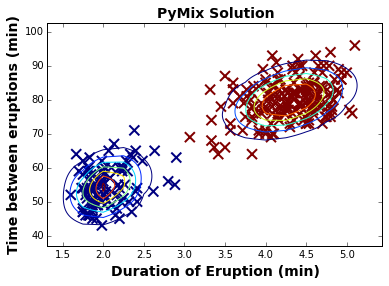

In [21]:
from scipy.stats import multivariate_normal

plt.scatter(x, y, marker='x', c=clust, s=100, linewidths=2)
plt.xlabel('Duration of Eruption (min)', fontsize=14, fontweight='bold')
plt.ylabel('Time between eruptions (min)', fontsize=14, fontweight='bold')
plt.title('PyMix Solution', fontsize=14, fontweight='bold')

X,Y = np.mgrid[1.5:5.5:.25, 40:100:.25]
pos = np.dstack((X, Y))
rv = multivariate_normal([  2.03661956,  54.48085757], 
                         [[0.06935171919374157, 0.4371039850349295], 
                          [0.4371039850349295, 33.71073889571335]])

plt.contour(X, Y, rv.pdf(pos))

pos = np.dstack((X, Y))
rv = multivariate_normal([  4.28986574,  79.97057117], 
                         [[0.16971015641467446, 0.937334525757079], 
                          [0.9373345257570792, 36.00949157968877]])
plt.contour(X, Y, rv.pdf(pos))
plt.show()

initialized mixing weights of each component 
[ 0.5  0.5]

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


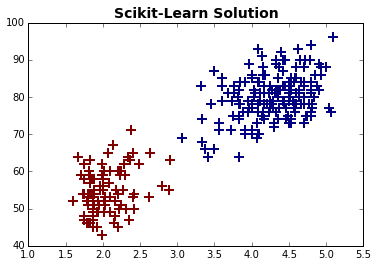

mixing weights after fit
[ 0.64373194  0.35626806]
means for each component after fit
[[  4.29050323  79.97808339]
 [  2.03736795  54.4887805 ]]
Covariances of components after fir
[[[  0.16991429   0.92743463]
  [  0.92743463  35.90235533]]

 [[  0.07096393   0.44389055]
  [  0.44389055  33.76486659]]]


In [22]:
### Scikit-learn
#Initializes with zero means and identity covariances of components
#http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html
from sklearn import mixture

gm = mixture.GMM(n_components=2, n_iter=100, covariance_type='full')
print "initialized mixing weights of each component "
print gm.weights_

gm.fit(c)
classes = gm.predict(c)
print('')
print classes
plt.scatter(c[:,0], c[:,1], c=classes, marker='+', s=100, linewidths=2)
plt.title('Scikit-Learn Solution', fontsize=14, fontweight='bold')

plt.show()
print "mixing weights after fit"
print gm.weights_
print "means for each component after fit"
print gm.means_
print "Covariances of components after fir"
print gm.covars_

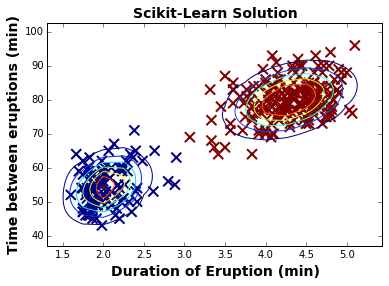

In [23]:

plt.scatter(x, y, marker='x', c=clust, s=100, linewidths=2)
plt.xlabel('Duration of Eruption (min)', fontsize=14, fontweight='bold')
plt.ylabel('Time between eruptions (min)', fontsize=14, fontweight='bold')
plt.title('Scikit-Learn Solution', fontsize=14, fontweight='bold')

X,Y = np.mgrid[1.5:5.5:.25, 40:100:.25]
pos = np.dstack((X, Y))
rv = multivariate_normal(gm.means_[0], gm.covars_[0])

plt.contour(X, Y, rv.pdf(pos))
pos = np.dstack((X, Y))
rv = multivariate_normal(gm.means_[1], gm.covars_[1])

plt.contour(X, Y, rv.pdf(pos))
plt.show()